In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
from scipy import optimize
import tables
import h5py



### This code displays radius vs v and radius vs u

In [2]:
uscal=15
vscal=10

uscal and vscal reduce arrays by their value in order to prevent memory overflow. Use when h5 files are very large (i.e. >2gB)

In [3]:
#rnp=np.load('rnp.npy')
#signp=np.load('sig.npy')
rnputil=np.load('rnputil.npy')
urange=np.load('urange.npy')[::uscal]
vrange=np.load('vrange.npy')[::vscal]

#print(rnputi

In [10]:
with h5py.File('rnp.h5','r') as f:
    r_group_key = list(f.keys())[0]
    rnpi=f[r_group_key]
    rnp = np.asarray(rnpi[::uscal,::vscal],dtype=np.float_)
    
with h5py.File('signp.h5','r') as f:
    sig_group_key = list(f.keys())[0]
    signpi=f[sig_group_key]
    signp = np.asarray(signpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('massnp.h5','r') as f:
    mass_group_key = list(f.keys())[0]
    massnpi=f[mass_group_key]
    massnp = np.asarray(massnpi[::uscal,::vscal])
print(str(rnp.nbytes)+" bytes")

print(rnp)

switchax=rnputil[9]
print(switchax)
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    signp=np.swapaxes(signp,0,1)
    #phinp=np.swapaxes(phinp,0,1)
    #massnp=np.swapaxes(massnp,0,1)
    print("Switched Axes")

OSError: Unable to open file (file signature not found)

In [5]:
print(len(urange),len(vrange))
print(len(rnp))

367 80
367


In [6]:
print(rnputil)

M=massnp[1][-1]
print(massnp)

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0
else:
    du0=1/N
    dv0=du0
    
#M=nan.max(massnp)

def fr(r,M,Q,Lambda):
    return 1-2*M/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.6,1.3,53.0],args=(M,Q,Lambda), method='hybr')
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
print(umax,vmax)
print(rminus,rplus,rcosm)

['4396800' '5496' '800' '5' '0.31805' '1.0' '0.95' '0.0' 'True' '0.0'
 'edd']
[[1.         1.         1.         ... 1.00285143 1.00285143 1.00285143]
 [1.         1.         1.         ... 1.00285142 1.00285142 1.00285142]
 [1.         1.         1.         ... 1.00285141 1.00285141 1.00285141]
 ...
 [1.         1.         1.         ... 1.0028079  1.00280855 1.00280916]
 [1.         1.         1.         ... 1.0028079  1.00280855 1.00280916]
 [1.         1.         1.         ... 1.0028079  1.00280855 1.00280916]]
N=4396800
99.88656249991408 19.75
0.6815867725315132 1.324116072041726 1.3241160720417546


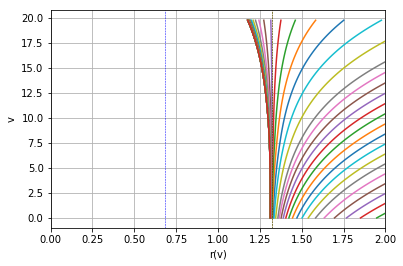

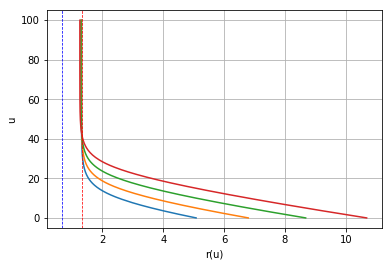

In [7]:
for line in rnp[::5]:
    plt.plot(line,vrange)
#plt.plot([0,vmax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
#plt.plot([0,vmax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
plt.xlim(0,np.nanmax(rnp)) 
plt.axvline(x=rplus,linewidth=0.5,linestyle='--',color='red')
plt.axvline(x=rminus,linewidth=0.5,linestyle='--',color='blue')
plt.axvline(x=rcosm,linewidth=0.5,linestyle='--',color='green')
#plt.xlim(1.2,1.4)
#plt.xlim(0,55)
plt.xlim(0,2.0)
#plt.ylim(0,10) 

plt.ylabel('v')
plt.xlabel('r(v)')
plt.grid()
#plt.savefig('num-rel-pics/r vs v-lambda-Phi.png',dpi=300)
plt.show()

ui=0
while ui < len(urange):
    try:
        plt.plot(rnp[:,ui+1],urange)
        ui += 10
    except:
        break
#plt.plot([0,umax],[rplus,rplus],'r--',color='red',linewidth=0.5, label='r+')
#plt.plot([0,umax],[rminus,rminus],'r--',color='blue',linewidth=0.5, label='r-')
plt.axvline(x=rplus,linewidth=0.75,linestyle='--',color='red')
plt.axvline(x=rminus,linewidth=0.75,linestyle='--',color='blue')
#plt.axvline(x=rcosm,linewidth=1.0,linestyle='--',color='green')
#plt.xlim(0,10)#/8)
#plt.ylim(0,umax)   
#plt.ylim(.686,.69) 
plt.ylabel('u')
plt.xlabel('r(u)')
plt.grid()
#plt.xscale('log')
#plt.yscale('log')
#plt.savefig('num-rel-pics/r vs u-Lambda-Phi.png',dpi=300)
plt.show()

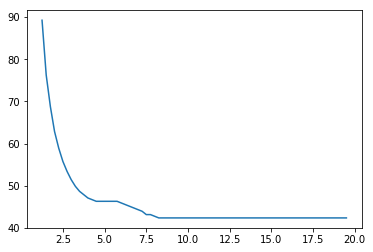

In [8]:
AHloc=[]
for j in range(0,Nv-1):
    for i in range(0,Nu):
        drv=rnp[i][j+1]-rnp[i][j]
        if drv<0.0 and rnp[i][j]<rplus:
            AHloc.append(i)
            break
        if i==Nu-1:
            AHloc.append(np.nan)
AHulist=[]            
for k in range(0,len(AHloc)):
    try:
        AHulist.append(urange[AHloc[k]])
    except:
        AHulist.append(np.nan)
#AHulist=np.take(urange,AHloc)
plt.plot(np.delete(vrange,-1),AHulist) 
plt.show()


###Legacy Code###

In [9]:
True=False

SyntaxError: can't assign to keyword (<ipython-input-9-ee82bf03c999>, line 1)

In [ ]:
levels=np.arange(2.0, np.nanmax(rnp), 1.0 )
#levels=np.arange(5.0, 100, 5.0 )
if Q==0.0:
     levels=np.insert(levels,0,[1.0])
if Q>0.0:
    levels=np.insert(levels,0,[rminus+.001,1.0,1.31,1.4])



plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(rnp),cmap=plt.cm.cool,vmin=0.0,vmax=np.nanmax(rnp))
plot4=plt.contour(vrange,urange,np.ma.masked_invalid(rnp),levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,np.ma.masked_invalid(rnp), [rplus],linewidths=0.5,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot7=plt.plot(np.delete(vrange,-1),AHulist) 
plt.clabel(plot4, levels, 
           inline=0, inline_spacing=0, 
           fmt='%1.3f',rightside_up=True,
           fontsize=8)
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,20)
plt.ylim(0,umax)
plt.xlim(0,vmax)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Radius vs (u,v) Coordinates')
#plt.savefig('ruv.png',dpi=300)
#plt.savefig('EH-mismatch.png',dpi=300)
plt.show()

In [ ]:
#levels=np.arange(5.0, np.nanmax(signp), 5.0 )
#levels=np.arange(5.0, 100, 5.0 )
#if Q==0.0:
     #levels=np.insert(levels,0,[1.0])
#if Q>0.0:
    #levels=np.insert(levels,0,[rminus,rminus+.01,.7,1.0])



plot1=plt.pcolormesh(vrange,urange,np.ma.masked_invalid(signp),cmap=plt.cm.cool,vmin=np.nanmin(signp),vmax=np.nanmax(signp))
#plot4=plt.contour(vrange,urange,np.ma.masked_invalid(signp),levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,np.ma.masked_invalid(rnp), [rplus],linewidths=0.5,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
#plt.clabel(plot4, levels, inline=0, inline_spacing=0, fmt='%1.2f',rightside_up=True,fontsize=8)
plt.xlabel('v')
plt.ylabel('u')
#plt.xlim(0,20)
plt.ylim(0,umax)
plt.xlim(0,vmax)
#plt.ylim(9.2758,9.2761)
plt.colorbar(plot1)
plt.title('Sigma vs (u,v) Coordinates')
#plt.savefig('EH-mismatch.png',dpi=300)
plt.show()

In [ ]:
print(len(rnp[0]))

In [ ]:
print(umax)

In [ ]:
plt.plot(urange,rnp[:,0])
plt.show()
#print(np.polyfit(urange,rnp[:,0],2.0))
plt.plot(vrange,rnp[0,:])
plt.show()
print(np.polyfit(vrange,rnp[0,:],2.0))
print(np.polyfit(urange,rnp[:,0],2.0))

In [ ]:
print(Nu,Nv)

u4=500
v4=1000

print(urange[u4],vrange[v4])

In [ ]:
dru=np.zeros((Nu-1))

for i in range(0,Nu-1):
    dru[i]=(rnp[i+1][v4]-rnp[i][v4])/(urange[i+1]-urange[i])
plt.plot(np.delete(urange,0),np.abs(dru))
plt.yscale('log')
plt.ylabel('|r,u|')
plt.xlabel('u')
plt.show()



In [ ]:
drv=np.zeros((Nv-1))

for j in range(0,Nv-1):
    drv[j]=(rnp[u4][j+1]-rnp[u4][j])/(vrange[j+1]-vrange[j])
plt.plot(np.delete(vrange,0),np.abs(drv))
plt.yscale('log')
plt.ylabel('|r,v|')
plt.xlabel('v')
plt.show()


In [ ]:
r=rnp[u4][v4]
print(r)
print(dru[u4],drv[v4],mth.exp(-signp[u4][v4]))
print(dru[u4]*drv[v4]*mth.exp(-signp[u4][v4]))
print(-1/4*(1-2*M0/r+Q**2/r**2))

In [ ]:
r=rnp[u4][v4]
print("M="+str((1.0+4.0*np.exp(-signp[u4][v4])*dru[u4]*drv[v4])*r/2+Q**2.0/(2.0*r)))
print(massnp[u4][v4])

In [ ]:
print(rnp[u4+1][v4],rnp[u4][v4])
print(rnp[u4+1][v4]-rnp[u4][v4])
print(urange[u4+1],urange[u4])
print(urange[u4+1]-urange[u4])

In [ ]:
print(rnp)